In [1]:
include("C:/Users/Public/code/Fish-Brain-Behavior-Analysis/code/data_analysis_Weihao/ERM_paper/src/util_weihao.jl")
# include("variational.jl")

linearize_triu (generic function with 1 method)

In [159]:
using Polynomials 
function subsampling(C)
    N = size(C,1)
    neural_set = random_clusters(N)
    iterations = floor(log2(N))
    cmap = plt.get_cmap("winter")
    colorList = cmap(range(0, 1, length=4))

    fig1, ax1 = plt.subplots()
    ax1.set_yscale("log")
    ax1.set_xscale("log")
    leg2 = []
    eigenspectrums = []
    nranks = []

    fig2, ax2 = plt.subplots()
    ax2.set_yscale("log")
    ax2.set_xscale("log")
    ax2.set_xlabel(L"\lambda")
    ax2.set_ylabel(L"p(\lambda)")
    i = 0
    for n in range(iterations, 7, step=-1)
        i+=1
        eigenvalues, errorbars, k = pca_cluster2(neural_set, C, Int(2^n))
        I = findall(eigenvalues .> 0)
        eigenvalues = eigenvalues[I]
        k = k[I]
        errorbars = errorbars[I]
        ax1.plot(k[1:end], eigenvalues[1:end], linewidth=1,marker="o",color=colorList[i,:],
        ms=2,label=@sprintf("N=%d",2^n))   
        λ_err_l = eigenvalues - errorbars./2
        λ_err_u = eigenvalues + errorbars./2
        ax1.fill_between(k[1:end],λ_err_l,λ_err_u,alpha=0.3)

        id, λ = dropzeros_and_less(eigenvalues)
        N = size(C,1)
        length = 50

        h_λ = fit(Histogram, λ, LogRange(minimum(λ),maximum(λ),length))
        h_λ = normalize(h_λ, mode=:pdf)

        λᵣ, p_sim = dropzero(h_λ)
        # p_sim = p_sim.*size(id,1)/2^n
        ax2.plot(λᵣ, p_sim, linewidth=1,color=colorList[i,:],label=@sprintf("N=%d",2^n))
        
        append!(eigenspectrums,eigenvalues[4:end])
        append!(nranks, k[4:end])

    end
    ax1.set_ylim([1e-2, 1e+3])
    c_diag = sort(diag(C), rev=true)
    ax1.scatter((1:N)/N, c_diag,marker="o",label="diagonal",color="gray",alpha=0.3,s=2)
    ax1.set_xlabel("rank/N")
    ax1.set_ylabel(L"\lambda")
    ax1.legend()

    ax2.legend()

    println("The data covariance matrix eigenspectrum:")
    IDX = (nranks .< 0.1) .& (nranks .> 4/N)
    exponent, ranks, eig_fit = powerlaw_fit(nranks, eigenspectrums, IDX)
    push!(leg2, "data fit")
    ax1.text(0.01, 50, ["exponent(data):", string(exponent)], fontsize=12)
end
    
function subsampling_subplot(C,ax1,ax2)
    N = size(C,1)
    neural_set = random_clusters(N)
    iterations = floor(log2(N))
    cmap = plt.get_cmap("winter")
    colorList = cmap(range(0, 1, length=4))

    ax1.set_yscale("log")
    ax1.set_xscale("log")
    leg2 = []
    eigenspectrums = []
    nranks = []

    ax2.set_yscale("log")
    ax2.set_xscale("log")
    ax2.set_xlabel(L"\lambda")
    ax2.set_ylabel(L"p(\lambda)")
    i = 0
    for n in range(iterations, 7, step=-1)
        i+=1
        eigenvalues, errorbars, k = pca_cluster2(neural_set, C, Int(2^n))
        I = findall(eigenvalues .> 0)
        eigenvalues = eigenvalues[I]
        k = k[I]
        errorbars = errorbars[I]
        ax1.plot(k[1:end], eigenvalues[1:end], linewidth=1,marker="o",color=colorList[i,:],
        ms=2,label=@sprintf("N=%d",2^n))   
        λ_err_l = eigenvalues - errorbars./2
        λ_err_u = eigenvalues + errorbars./2
        ax1.fill_between(k[1:end],λ_err_l,λ_err_u,alpha=0.3)

        id, λ = dropzeros_and_less(eigenvalues)
        N = size(C,1)
        length = 50

        h_λ = fit(Histogram, λ, LogRange(minimum(λ),maximum(λ),length))
        h_λ = normalize(h_λ, mode=:pdf)

        λᵣ, p_sim = dropzero(h_λ)
        # p_sim = p_sim.*size(id,1)/2^n
        ax2.plot(λᵣ, p_sim, linewidth=1,color=colorList[i,:],label=@sprintf("N=%d",2^n))
        
        append!(eigenspectrums,eigenvalues[4:end])
        append!(nranks, k[4:end])

    end
    ax1.set_ylim([1e-2, 1e+3])
    c_diag = sort(diag(C), rev=true)
    ax1.scatter((1:N)/N, c_diag,marker="o",label="diagonal",color="gray",alpha=0.3,s=2)
    ax1.set_xlabel("rank/N")
    ax1.set_ylabel(L"\lambda")
    ax1.legend()

    ax2.legend()

    println("The data covariance matrix eigenspectrum:")
    IDX = (nranks .< 0.1) .& (nranks .> 4/N)
    exponent, ranks, eig_fit = powerlaw_fit(nranks, eigenspectrums, IDX)
    push!(leg2, "data fit")
    # ax1.text(0.01, 50, ["exponent(data):", string(exponent)], fontsize=12)
    return ax1, ax2
end

function subsampling_rank_subplot(C,ax1)
    N = size(C,1)
    neural_set = random_clusters(N)
    iterations = floor(log2(N))
    cmap = plt.get_cmap("winter")
    colorList = cmap(range(0, 1, length=4))
    colorList = colorList[[1,4],:]
    ax1.set_yscale("log")
    ax1.set_xscale("log")
    leg2 = []
    eigenspectrums = []
    nranks = []
    i = 0
    # only show N0 and N/4
    for n in range(iterations, iterations-2, step=-2)
        i+=1
        eigenvalues, errorbars, k = pca_cluster2(neural_set, C, Int(2^n))
        I = findall(eigenvalues .> 0)
        eigenvalues = eigenvalues[I]
        k = k[I]
        errorbars = errorbars[I]
        ax1.plot(k[1:end], eigenvalues[1:end], linewidth=0.2,marker="o",color=colorList[i,:],
        ms=0.3,label=@sprintf("N=%d",2^n))  
        index,cutoff1,cutoff2, y2_ls = collapse_index_rank(C)
        k_id = findall(x -> x >= cutoff1 && x < cutoff2, k)
        k = k[k_id]
        
        if i == 2
            print(length(y2_ls))
            print(length(k_id))
            λ_err_l = eigenvalues[k_id] 
            λ_err_u = eigenvalues[k_id] .+ y2_ls[1:end]
            ax1.fill_between(k[1:end],λ_err_l,λ_err_u,alpha=0.9,color="pink")
        end
    end
    ax1.set_ylim([1, 50])
    c_diag = sort(diag(C), rev=true)

    return ax1
end

function random_clusters(N)
    iterations = Int(log2(N))
    cluster_set = Vector{Any}(undef, iterations+1)
    L = N
    cluster_set[1] = Vector{Any}(undef, L)
    y = randperm(N)
    for k = 1:L
        cluster_set[1][k] = y[k]
    end
    for n = 2:iterations+1
        L = Int(L/2)
        cluster_set[n] = Vector{Any}(undef, L)
        for k = 1:L
            cluster_set[n][k] = [cluster_set[n-1][2*k-1]; cluster_set[n-1][2*k]]
        end
    end
    return cluster_set
end
    

function pca_cluster2(cluster_set, C_original, K)
    n = Int(log2(K) + 1)
    N = length(cluster_set[n])
    eigenspectrum = zeros(K,N)
    for i in 1:N
        IDX = cluster_set[n][i]
        c = C_original[IDX,:]
        c = c[:,IDX]
        LAMBDA = sort(eigvals(Hermitian(c)), rev=true)
        LAMBDA = LAMBDA[LAMBDA .> 0]
        ranks = length(LAMBDA)
        eigenspectrum[1:ranks,i] = LAMBDA
    end
    eigen = mean(eigenspectrum, dims=2)
    errorbars = 2 * std(eigenspectrum, dims=2) / sqrt(N)
    k = (1:K) / K
    return eigen, errorbars, k
end

function powerlaw_fit(x, y, range)
    if size(x, 1) == 1
        x = transpose(x)
    end
    if size(y, 1) == 1
        y = transpose(y)
    end
    p = Polynomials.polyfitA(log.(x[range]), log.(y[range]), 1)
    println("exponent = $(p[1])")
    exponent = p[1]
    x_fit = logspace(log10(minimum(x)), log10(maximum(x)), 10)
    y_fit = exp(p[2]) .* x_fit .^ p[1]
    return exponent, x_fit, y_fit, p
end

function logspace(start, stop, n)
    return exp.(range(start, stop, length=n))
end

logspace (generic function with 1 method)

In [160]:
N = 2^10 #number of neurons
ρ = 256#density = N/L^2
d = 3 #dimensionality
L = (N/ρ)^(1/d) #box size
ξ = 10^18
δ = 0.1
#ϵ = δ*density^(-1/d)
ϵ = 0.03125
#ϵ = 0.1
μ = 0.1
β = 0
# L = (N/ρ)^(1/n)
# ρ = N/L^d
L

different_neural_variability = false
if different_neural_variability
    σ² = vec(rand(LogNormal(0,0.5),N,1))
else
    σ² = ones(N,1)
end

#σ² = σ²/mean(σ²) #normalize so that σ̄² = 1
σ = vec(broadcast(√,σ²))
Δ = diagm(σ)

#p = ERMParameter(;N = N, L = L, ρ = density, n = d, ϵ = ϵ, μ = μ, ξ = ξ, σ̄² = mean(σ²), σ̄⁴ = mean(σ².^2))
p = ERMParameter(;N = N, L = L, ρ = ρ, n = d, ϵ = ϵ, μ = μ, ξ = ξ, β = β, σ̄² = mean(σ²), σ̄⁴ = mean(σ².^2))

#=
N number of neurons
L box size
ρ density
n dimensionality
ϵ parameter in distance function f
μ parameter in distance function f
ξ parameter in distance function f
β = 1/ξ parameter in distance function f
σ̄² mean variance of neural activity
σ̄⁴ mean 4th moment of neural activity
#parameters in the ERM model
=#

points = rand(Uniform(-L/2,L/2),N,d) #points are uniformly distributed in a region 
C = reconstruct_covariance(points, p, subsample = false)
 

1024×1024 Matrix{Float64}:
 1.0       0.744682  0.693885  0.71543   …  0.712931  0.733496  0.734226
 0.744682  1.0       0.67491   0.732761     0.701818  0.71909   0.708382
 0.693885  0.67491   1.0       0.661301     0.737309  0.723177  0.734116
 0.71543   0.732761  0.661301  1.0          0.677471  0.688688  0.679781
 0.697793  0.698467  0.695697  0.688424     0.730388  0.732479  0.703224
 0.691835  0.676395  0.818119  0.660229  …  0.750112  0.728778  0.740076
 0.700251  0.688572  0.714567  0.682157     0.73226   0.730911  0.708476
 0.764029  0.724546  0.675688  0.734016     0.68645   0.699366  0.698148
 0.73669   0.694498  0.684619  0.697841     0.684813  0.694227  0.697995
 0.728669  0.725673  0.684245  0.683873     0.704453  0.715845  0.730758
 0.753296  0.70833   0.733489  0.68547   …  0.746015  0.762289  0.800321
 0.694728  0.70201   0.697503  0.677329     0.75399   0.746922  0.716756
 0.718485  0.699029  0.746684  0.681507     0.79465   0.786436  0.754088
 ⋮                      

In [163]:
using LinearAlgebra, Random, Statistics
function collapse_index_rank(C)
    

    # Input:
    # Covariance C,
    # large eig cut-off percentile p0
    # sampling ratio s = Ns/N
    # N = 1000
    # ggg = 0.5
    # C = I(N) - ggg*randn(N,N)/sqrt(N)
    # C = inv(C)
    # C = C * C'
    # C *= 1-ggg^2
    s = 0.25
    p0 = 0.01

    N,_ = size(C)
    Ns = round(Int, N*s)
    lb_N = -sort(-eigvals(Hermitian(C)))
    ntrial = 20
    lb_Ns = zeros(Ns,ntrial)
    Threads.@threads for i in 1:ntrial
        i_s = randperm(N)[1:Ns]
        Cs = copy(C[:,i_s])
        Cs = Cs[i_s,:]
        lb_Ns[:,i] = -sort(-eigvals(Hermitian(Cs)))
    end
    lb_Ns = vec(mean(lb_Ns,dims=2))

    r0 = round(Int, Ns*p0-0.5) 
    # r0 = 10
    r1 = maximum(findall(lb_Ns .> 1))
    f_Ns = log.(lb_Ns[r0+1:r1])
    f_N = zeros(length(f_Ns))
    for k in 1:length(f_N)
        i = r0 + k
        j = (i)/Ns*N
        if isinteger(j)
            j = convert(Int,j)
            f_N[k] = log.(lb_N[j])
        else
            j0 = convert(Int,floor(j))
            # f_N[k] = (j0+1-j)*lb_N[j0] + (j-j0)*lb_N[j0+1]

            x = log(j/N)
            x0 = log(j0/N)
            x1 = log((j0+1)/N)
            y0 = log(lb_N[j0])
            y1 = log(lb_N[j0+1])
            f_N[k] = (y0*(x1-x) + y1*(x-x0)) / (x1-x0)
        end
    end
    S = 0
    y3_ls = zeros(length(f_N)-1,1)
    for k in 1:length(f_N)-1
        i = r0 + k
        a = (i)/Ns
        b = (i+1)/Ns
        y1 = abs(f_N[k] - f_Ns[k])
        y2 = abs(f_N[k+1] - f_Ns[k+1])
        S += log(b/a)*(y1+y2)/2
        y3_ls[k] = abs(exp(f_N[k+1]) - exp(f_Ns[k+1])) #visualize shaded area
    end
    CI = S/log(N/Ns)/log((r1)/(r0+1))
    return CI, (r0+1)/Ns, r1/Ns, y3_ls
end

# function collapse_index_rank(C)
    

#     # Input:
#     # Covariance C,
#     # large eig cut-off percentile p0
#     # sampling ratio s = Ns/N
#     # N = 1000
#     # ggg = 0.5
#     # C = I(N) - ggg*randn(N,N)/sqrt(N)
#     # C = inv(C)
#     # C = C * C'
#     # C *= 1-ggg^2
#     s = 0.5
#     p0 = 0.05

#     N,_ = size(C)
#     Ns = round(Int, N*s)
#     lb_N = -sort(-eigvals(Hermitian(C)))
#     lb_Ns = zeros(Ns)
#     ntrial = 10
#     for i in 1:ntrial
#         i_s = randperm(N)[1:Ns]
#         Cs = copy(C[:,i_s])
#         Cs = Cs[i_s,:]
#         lb_Ns += -sort(-eigvals(Hermitian(Cs)))
#     end
#     lb_Ns /= ntrial

#     r0 = round(Int, Ns*p0-0.5) # note python's rank starts with 0
#     r1 = maximum(findall(lb_Ns .> 1))
#     f_Ns = lb_Ns[r0+1:r1]
#     f_N = zeros(length(f_Ns))
#     for k in 1:length(f_N)
#         i = r0 + k
#         j = (i)/Ns*N
#         if isinteger(j)
#             j = convert(Int,j)
#             f_N[k] = lb_N[j]
#         else
#             j0 = convert(Int,floor(j))
#             f_N[k] = (j0+1-j)*lb_N[j0] + (j-j0)*lb_N[j0+1]
#         end
#     end
#     S = 0
#     for k in 1:length(f_N)-1
#         i = r0 + k
#         a = (i)/Ns
#         b = (i+1)/Ns
#         y1 = abs(log(f_N[k]/f_Ns[k]))
#         y2 = abs(log(f_N[k+1]/f_Ns[k+1]))
#         S += log(b/a)*(y1+y2)/2
#     end
#     CI = S/log(N/Ns)/log((r1)/(r0+1))
#     return CI
# end

collapse_index_rank (generic function with 1 method)

9292

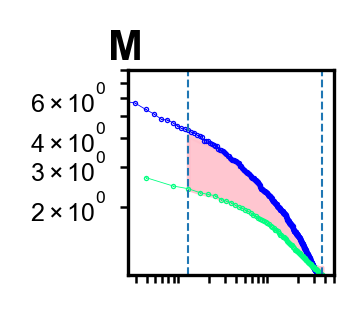

Any[]

In [171]:
import PyPlot as plt
uppercase_letters = ["A","B","C","D","E","F","G","H","I","J","K","L","M"]
fig = plt.figure(figsize=(6.85,5),facecolor="w",frameon=true, dpi=300)
# plt.rc("font",size=6,family="sans-serif")
plt.rc("font",size=6,family="Arial")
# plt.rc("font", serif="Helvetica")
plt.rc("pdf", fonttype=42)
yratio = 6.85/5


##################################
##---------ERM rank plot--------##
##################################

ipanel = 0



x00 = [.08, .3, .52, .74] #.+.01 # x position 
y00 = [.7, .4, .1] # y position
xs = 0.1 # length of x axis
ys = xs * yratio # length of y axis

index_all = zeros(3,4)
μ_list = [0.1,0.5,0.9,1.9]
for d = [2]
    for μ_id = [4]#,2,3,4]
        
        ipanel+=1
        μ = μ_list[μ_id]
        ax = fig.add_axes([x00[μ_id], y00[d], xs,ys])
        N = 2^10 #number of neurons
        # d = 2 #dimensionality
        ρ = 256
        L = (N/ρ)^(1/d) #box size
        ξ = 10^18
        δ = 0.1
        ϵ = 0.03125
        # μ = 0.5
        β = 0
        # ρ = N/L^d
        p = ERMParameter(;N = N, L = L, ρ = ρ, n = d, ϵ = ϵ, μ = μ, ξ = ξ, β = β, σ̄² = mean(σ²), σ̄⁴ = mean(σ².^2))
        points = rand(Uniform(-L/2,L/2),N,d) #points are uniformly distributed in a region 
        C = reconstruct_covariance(points, p, subsample = false)
        subsampling_rank_subplot(C,ax)
        if ipanel == 12
            ax.legend(bbox_to_anchor=(1.0, 0.1), loc="lower right", bbox_transform=fig.transFigure)
            # ax.arrow(2,-10,0,10,fc="k",ec="k",clip_on=false)
        end
        ax.text(-0.1, 1.05, "M",transform=ax.transAxes,size=10,weight="bold")
        index,cutoff1,cutoff2, y2_ls = collapse_index_rank(C)
        index_all[d,μ_id] = copy(index)
        ax.axvline(x=cutoff1,lw=0.5,linestyle="dashed")
        ax.axvline(x=cutoff2,lw=0.5,linestyle="dashed")
        ax.set_ylim([1, 8])
        ax.set_xlim([0.0025,0.5])
    end
end

#     setp(texts[i], color=get(handles[i], "color"))
# end
ax.set_xticks([])
ax.set_yticks([])

In [172]:
fig.savefig("./ERM_mu_d_effect_illustration.pdf")

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


In [12]:
fig.savefig("./figure/ERM_mu_d_effect.png",dpi=300)

In [17]:
# Input:
# Covariance C,
# large eig cut-off percentile p0
# sampling ratio s = Ns/N
# N = 1000
# ggg = 0.5
# C = I(N) - ggg*randn(N,N)/sqrt(N)
# C = inv(C)
# C = C * C'
# C *= 1-ggg^2
# C = matread("C.mat")["C"]
# i_s = vec(matread("C.mat")["i_s"]) .+ 1
# s = 0.5
# p0 = 0.03

# N,_ = size(C)
# Ns = round(Int, N*s)
# lb_N = -sort(-eigvals(Hermitian(C)))
# lb_Ns = zeros(Ns)
# ntrial = 1
# for i in 1:ntrial
#     # i_s = randperm(N)[1:Ns]
#     Cs = copy(C[:,i_s])
#     Cs = Cs[i_s,:]
#     lb_Ns += -sort(-eigvals(Hermitian(Cs)))
# end
# lb_Ns /= ntrial

# r0 = round(Int, Ns*p0-0.5) # note python's rank starts with 0
# r1 = maximum(findall(lb_Ns .> 1))
# f_Ns = lb_Ns[r0+1:r1]
# f_N = zeros(length(f_Ns))
# for k in 1:length(f_N)
#     i = r0 + k
#     j = (i)/Ns*N
#     if isinteger(j)
#         j = convert(Int,j)
#         f_N[k] = lb_N[j]
#     else
#         j0 = convert(Int,floor(j))
#         f_N[k] = (j0+1-j)*lb_N[j0] + (j-j0)*lb_N[j0+1]
#     end
# end
# S = 0
# for k in 1:length(f_N)-1
#     i = r0 + k
#     a = (i)/Ns
#     b = (i+1)/Ns
#     y1 = abs(log(f_N[k]/f_Ns[k]))
#     y2 = abs(log(f_N[k+1]/f_Ns[k+1]))
#     S += log(b/a)*(y1+y2)/2
# end
# CI = S/(log(N/Ns)+log((r1)/(r0+1)))
# println(CI)

In [18]:
C = matread("C.mat")["C"]
i_s = vec(matread("C.mat")["i_s"]) .+ 1
s = 0.5
p0 = 0.05

N,_ = size(C)
Ns = round(Int, N*s)
lb_N = -sort(-eigvals(Hermitian(C)))
ntrial = 1
lb_Ns = zeros(Ns,ntrial)
Threads.@threads for i in 1:ntrial
    # i_s = randperm(N)[1:Ns]
    Cs = copy(C[:,i_s])
    Cs = Cs[i_s,:]
    lb_Ns[:,i] = -sort(-eigvals(Hermitian(Cs)))
end
lb_Ns = vec(mean(lb_Ns,dims=2))

r0 = round(Int, Ns*p0-0.5) # note python's rank starts with 0
r1 = maximum(findall(lb_Ns .> 1))
f_Ns = log.(lb_Ns[r0+1:r1])
f_N = zeros(length(f_Ns))
for k in 1:length(f_N)
    i = r0 + k
    j = (i)/Ns*N
    if isinteger(j)
        j = convert(Int,j)
        f_N[k] = log.(lb_N[j])
    else
        j0 = convert(Int,floor(j))
        # f_N[k] = (j0+1-j)*lb_N[j0] + (j-j0)*lb_N[j0+1]

        x = np.log(j/N)
        x0 = np.log(j0/N)
        x1 = np.log((j0+1)/N)
        y0 = np.log(lb_N[j0])
        y1 = np.log(lb_N[j0+1])
        f_N[k] = (y0*(x1-x) + y1*(x-x0)) / (x1-x0)
    end
end
S = 0
for k in 1:length(f_N)-1
    i = r0 + k
    a = (i)/Ns
    b = (i+1)/Ns
    y1 = abs(f_N[k] - f_Ns[k])
    y2 = abs(f_N[k+1] - f_Ns[k+1])
    S += log(b/a)*(y1+y2)/2
end
CI = S/log(N/Ns)/log((r1)/(r0+1))

LoadError: File "C.mat" does not exist and create was not specified

In [19]:
0.5/(3-0.5)

0.2

In [20]:
0.9/(3-0.9)

0.42857142857142855

In [21]:
zeros(3)

3-element Vector{Float64}:
 0.0
 0.0
 0.0